In [1]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns

%matplotlib inline

FIG_WIDTH=20
FIG_HEIGTH=8

The cpu/memory graphs are wrong: they only count the loop memory usage!

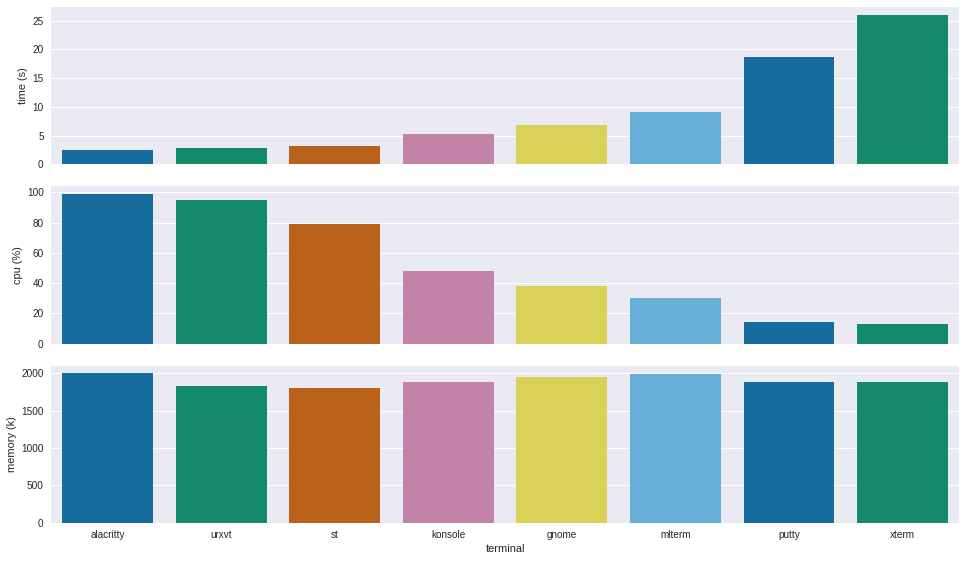

In [2]:
resources = pandas.read_csv('performance.csv')

ignored_terms = ['xvt',  # rare
                 'eterm',  # too old
                 'kterm',  # too old
                 'mrxvt',  # mostly like rxvt
                 'xfce4-terminal',  # like gnome-terminal
                 'xfce4',  # synonym
                 'terminator',  # synonym
                 'Terminator']  # like gnome-terminal
for terminal in ignored_terms:
    resources = resources[resources.terminal != terminal]  # rare
resources = resources.sort_values(by='time (s)')
resources.sort_values(by='time (s)')

g = sns.PairGrid(resources,
                 x_vars='terminal',
                 y_vars=['time (s)', 'cpu (%)', 'memory (k)'])
g.map(sns.barplot, palette="colorblind")
g.fig.set_figwidth(FIG_WIDTH)
g.fig.set_figheight(FIG_HEIGTH)

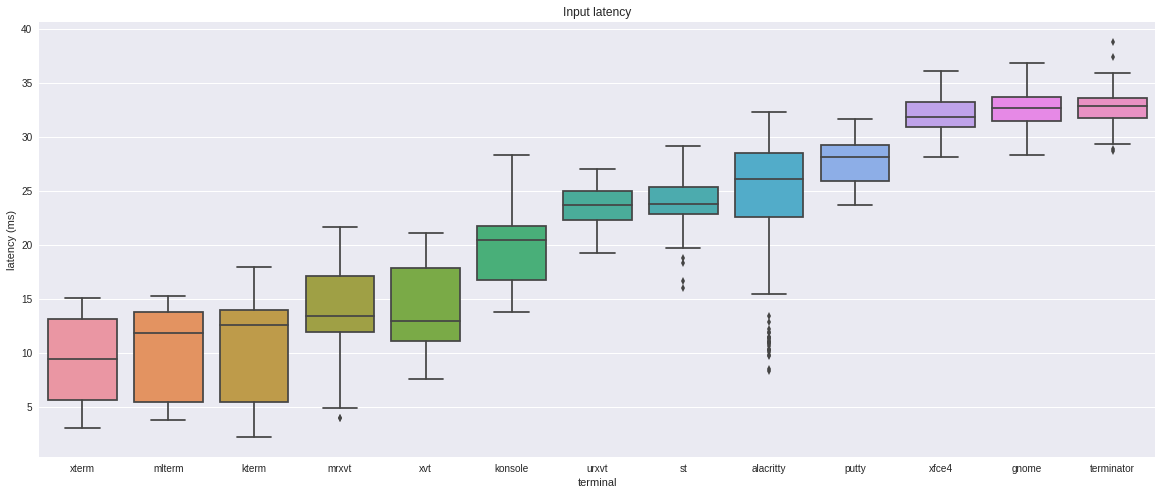

In [3]:
latency = pandas.read_csv('latency-all.csv')

for terminal in []:  # use ignored_terms to skip the same as above
    try:
        latency.drop(terminal, axis=1, inplace=True)
    except ValueError:
        pass

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.boxplot(data=latency)
ax.set_title('Input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')



In [4]:
data = pandas.read_csv('times-100x100000.csv')
data

,terminal,time,cpu,memory
0,uxterm,2.82,108,48884
1,uxterm,2.84,109,49144
2,uxterm,2.78,110,49128
3,uxterm,2.78,108,49060
4,uxterm,2.84,108,49056
5,uxterm,0.11,47,15396
6,uxterm,2.63,112,49060
7,uxterm,2.67,113,49104
8,uxterm,2.65,113,49204
9,uxterm,2.62,113,48924


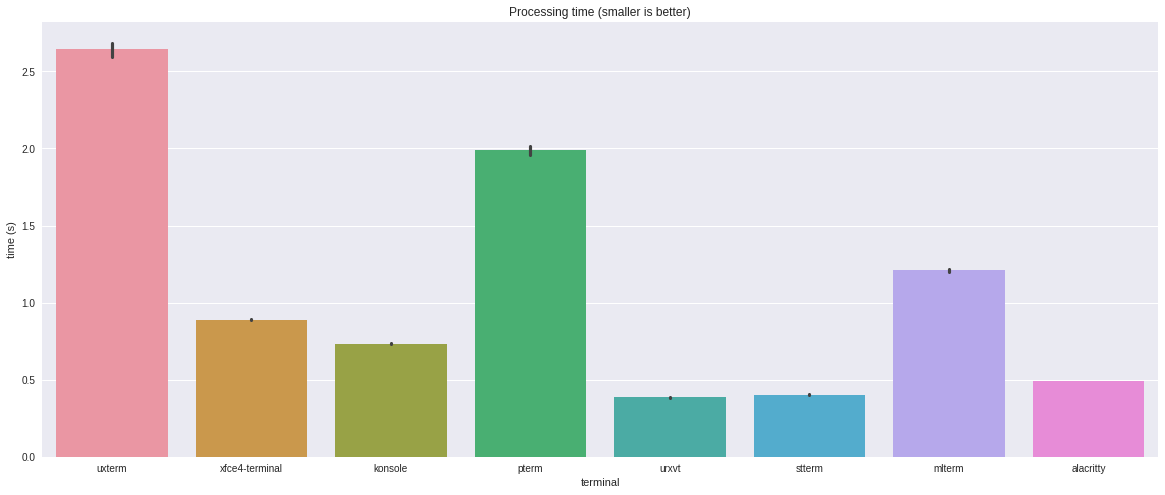

In [12]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)
#ax = sns.boxplot(data=data, x='terminal', y='time')
ax = sns.barplot(data=data, x='terminal', y='time')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (s)')

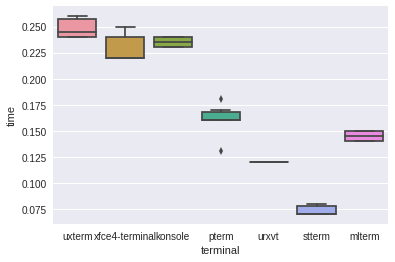

In [6]:
small = pandas.read_csv('times-10x10000.csv')
ax = sns.boxplot(data=small, x='terminal', y='time')

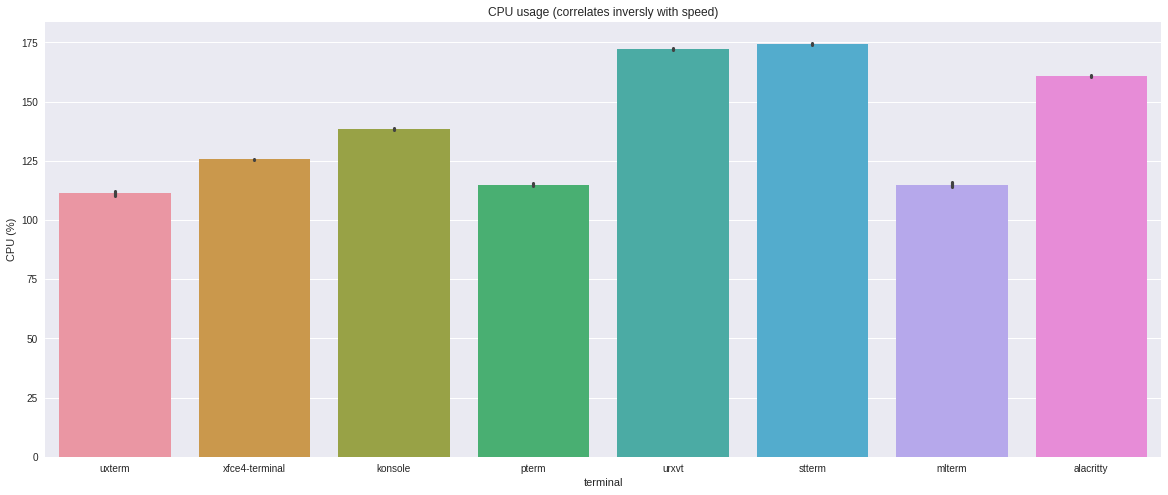

In [14]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)
ax = sns.barplot(data=data, x='terminal', y='cpu')
ax.set_title('CPU usage (correlates inversly with speed)')
ax.set_ylabel('CPU (%)')

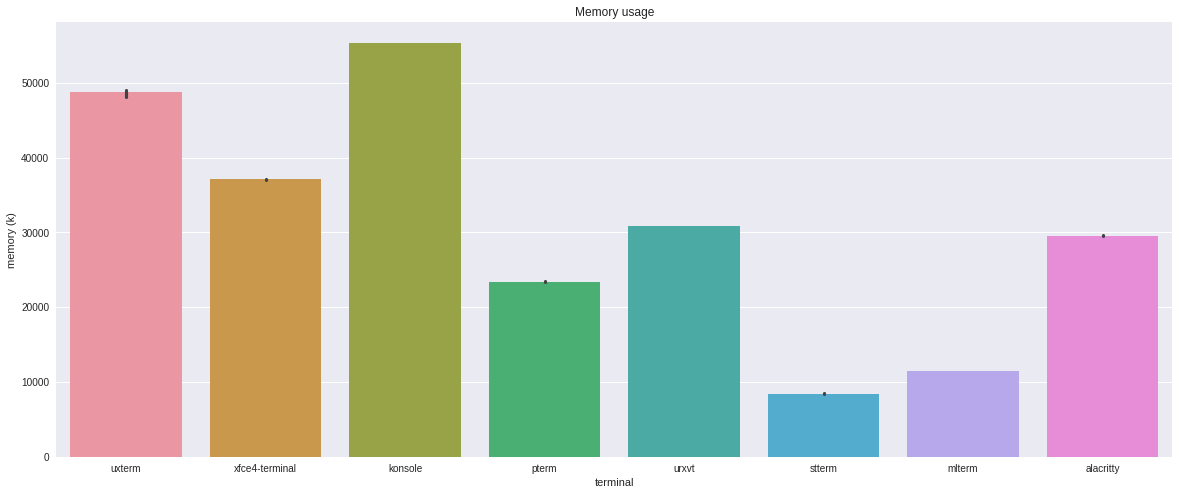

In [8]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)
ax = sns.barplot(data=data, x='terminal', y='memory')
ax.set_title('Memory usage')
ax.set_ylabel('memory (k)')
